# visualizing the loss function

### loss in regression problems is generally the scalar sum of the difference between evaluated value per training step, and actual value

In [1]:
# FRONT MATTER - IMPORT LIBRARIES
# so we can use tensorflow
import tensorflow as tf
import scipy.io as sio
import numpy as np

# so we can plot training data
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

source data is: [ 0.  0.  0.  0.  0.]
target data is: [ 0.  1.  2.  3.  4.]
trained 'b' is: [ 0.          0.99999964  1.99999928  2.99999857  3.99999857]


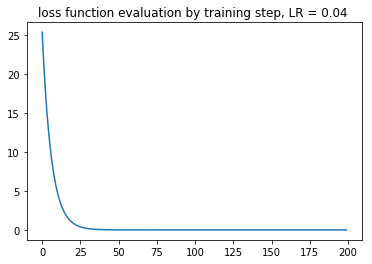

In [2]:
source = tf.placeholder(dtype=tf.float32)
labels = tf.placeholder(dtype=tf.float32)

b      = tf.Variable(np.zeros(5), dtype=tf.float32)

logits = source + b
loss   = tf.reduce_sum(tf.square(logits-labels))

train_op = tf.train.GradientDescentOptimizer(learning_rate=.04).minimize(loss)

init_op  = tf.global_variables_initializer()

with tf.Session() as sess:

    # initialize global variables
    sess.run(init_op)

    # arrays that will each hold a snapshot at each step of training
    loss_eval, b_eval = [], []
    
    dummy_src = np.zeros(5) #[0, 0, ... {N}]
    dummy_tgt = np.arange(5, dtype=np.float32) #[0, 1, ... N]

    print("source data is: {}".format(dummy_src))
    print("target data is: {}".format(dummy_tgt))
    
    # run the training operation 
    for indx in range(200):
        sess.run(train_op, feed_dict={source:dummy_src, labels:dummy_tgt})
        
        b_eval.append( sess.run(b) )
        loss_eval.append( sess.run(loss, feed_dict={source:dummy_src, labels:dummy_tgt}) )

    print("trained 'b' is: {}".format(sess.run(b)))
    sio.savemat('b', {'b':b_eval, 'loss':loss_eval})
        
    plt.plot(loss_eval)
    plt.title("loss function evaluation by training step, LR = 0.04 ")
    plt.show()

Here, we can see the loss decreasing as the trained value of b approaches the actual value

![](./kern_loss.gif)